In [26]:
from collections import Counter
from unidecode import unidecode

import json 
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

%matplotlib notebook

Ideas
- nube de hashtags
- palabras mas comunes
- revisar los tweet con mas retweets
- 

In [61]:
!ls -1 ../data/raw

uy_tweets_coronavirus_2020-04-09T09:19:19.598204.json
uy_tweets_coronavirusenuruguay_2020-04-09T18:20:53.154398.json
uy_tweets_covid19_2020-04-09T00:01:18.808683.json
uy_tweets_covid_19_2020-04-09T00:47:37.969046.json
uy_tweets_covid19uruguay_2020-04-08T20:45:11.934235.json
uy_tweets_covid_2020-04-09T02:48:43.809046.json
uy_tweets_cuarentena_2020-04-09T21:05:52.382785.json
uy_tweets_quedateencasa_2020-04-09T01:48:09.328509.json


In [62]:
file_path = [
'../data/raw/uy_tweets_coronavirus_2020-04-09T09:19:19.598204.json',
'../data/raw/uy_tweets_coronavirusenuruguay_2020-04-09T18:20:53.154398.json',
'../data/raw/uy_tweets_covid19_2020-04-09T00:01:18.808683.json',
'../data/raw/uy_tweets_covid_19_2020-04-09T00:47:37.969046.json',
'../data/raw/uy_tweets_covid19uruguay_2020-04-08T20:45:11.934235.json',
'../data/raw/uy_tweets_covid_2020-04-09T02:48:43.809046.json',
'../data/raw/uy_tweets_cuarentena_2020-04-09T21:05:52.382785.json',
'../data/raw/uy_tweets_quedateencasa_2020-04-09T01:48:09.328509.json',
]
tweets = []
for path in file_path:
    print(path)
    with open(path, 'r') as f:
        tweets.extend(json.load(f))


../data/raw/uy_tweets_coronavirus_2020-04-09T09:19:19.598204.json
../data/raw/uy_tweets_coronavirusenuruguay_2020-04-09T18:20:53.154398.json
../data/raw/uy_tweets_covid19_2020-04-09T00:01:18.808683.json
../data/raw/uy_tweets_covid_19_2020-04-09T00:47:37.969046.json
../data/raw/uy_tweets_covid19uruguay_2020-04-08T20:45:11.934235.json
../data/raw/uy_tweets_covid_2020-04-09T02:48:43.809046.json
../data/raw/uy_tweets_cuarentena_2020-04-09T21:05:52.382785.json
../data/raw/uy_tweets_quedateencasa_2020-04-09T01:48:09.328509.json


In [63]:
len(tweets)

135417

# Create dataset

In [64]:
dataset = []
for tweet in tweets:
    keys_tw = ['created_at', 'id', 'full_text', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang']
    keys_usr = ['screen_name', 'location', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'verified', 'statuses_count', ]
    tw = {key: tweet[key]for key in keys_tw}
    usr = {'user_' + key: tweet['user'][key]for key in keys_usr}
    tw = {**tw, **usr}
    dataset.append(tw)

In [65]:
df = pd.DataFrame(dataset)
df['created_at'] = pd.to_datetime(df['created_at'])

In [66]:
df.shape

(135417, 18)

In [67]:
df.columns

Index(['created_at', 'favorite_count', 'favorited', 'full_text', 'id',
       'is_quote_status', 'lang', 'retweet_count', 'retweeted',
       'user_created_at', 'user_favourites_count', 'user_followers_count',
       'user_friends_count', 'user_listed_count', 'user_location',
       'user_screen_name', 'user_statuses_count', 'user_verified'],
      dtype='object')

# Save Uruguayan Users

In [68]:
selector = (
    (df['user_location'].isin(['Uruguay', 'Montevideo, Uruguay']))
    & (~df['user_screen_name'].duplicated())
)

In [69]:
users = df.loc[selector, 'user_screen_name'].value_counts()
users.to_csv('../data/uy_users.csv')

/home/cesar/software/houses-project/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


# Time Series Analysis

<IPython.core.display.Javascript object>


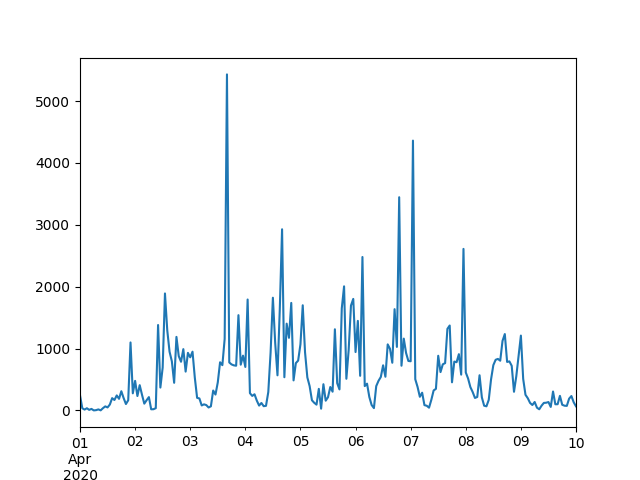

In [70]:
f, ax = plt.subplots()
df.groupby([df['created_at'].dt.round('H')])['created_at'].count().loc['2020-04-01':].plot(ax=ax)

# Hashtags

In [71]:
hashtags = [unidecode(k['text'].lower()) for tweet in tweets for k in tweet['entities']['hashtags']]

In [72]:
hashtags_count = Counter(hashtags)
hashtags_count.most_common(10)

[('afp', 38412),
 ('ultimahora', 20408),
 ('quedateencasa', 14520),
 ('covid19', 13015),
 ('coronavirus', 12818),
 ('coronavirusenuruguay', 4307),
 ('covid19uruguay', 2811),
 ('yomequedoencasa', 2391),
 ('sinae', 2197),
 ('covid', 1500)]

In [73]:
wordcloud = WordCloud().generate_from_frequencies(hashtags_count)


<IPython.core.display.Javascript object>


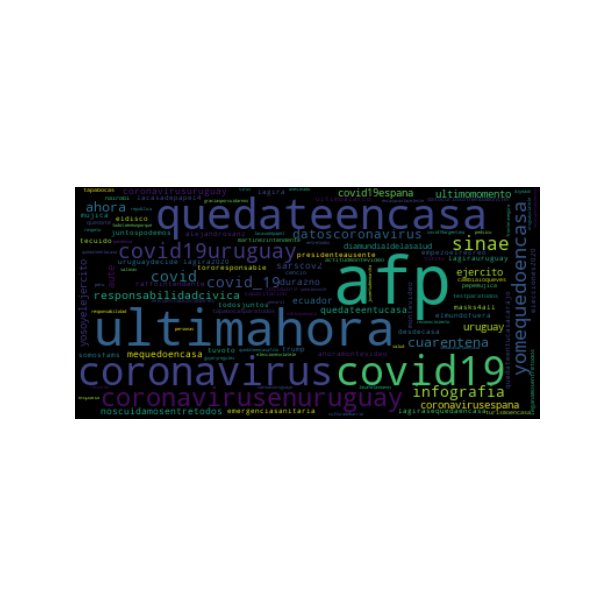

(-0.5, 399.5, 199.5, -0.5)

In [74]:
f, ax = plt.subplots(figsize=(6,6))
ax.imshow(wordcloud, interpolation="bilinear")
ax.axis("off")


In [75]:
tt = [tweet['full_text'] for tweet in tweets if any([True for k in tweet['entities']['hashtags'] if k['text'].lower()=='afp'])]